<a href="https://colab.research.google.com/github/impruthvi/Dog-Vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

In [ ]:
# Run this cell if TensorFlow 2.x isn't default in colab
try:
  # %tensorflow_version only exist in Colab
  %tensorflow_version
except Exception:
  pass

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version",tf.__version__)
print("TF Hub Version",hub.__version__)

# Check for GTU availability

print("GPU","Available(Yesssss)" if tf.config.list_physical_devices("GPU") else "Not available")

TF Version 2.4.1
TF Hub Version 0.12.0
GPU Available(Yesssss)


## Getting our data ready(turning into Tensors)

Will all machine learning models, our data has be in numerical format.So that's what we'll be doing first.Truning our images into Tensor(numerical representations).

Let's start by accessing our data and checking out that labels.

In [ ]:
# Checkout the labels of our data
import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     20963bd7d0202c45005f5f0a052858a5  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


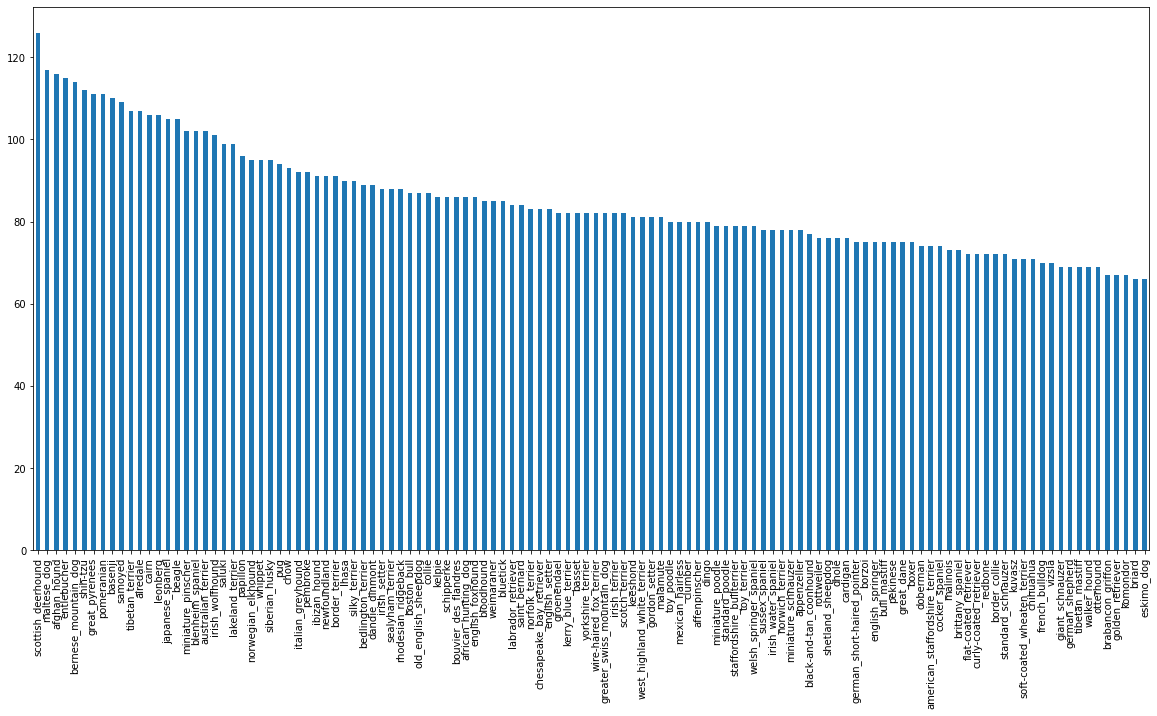

In [ ]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

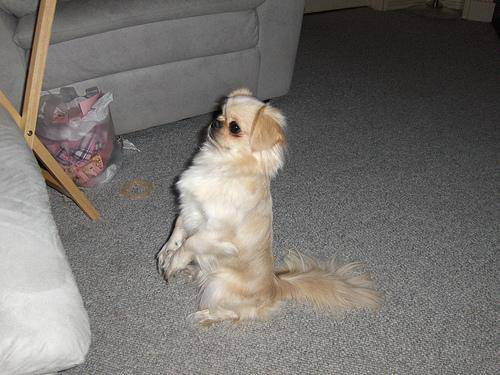

In [ ]:
# Let's viev an images

from IPython.display import Image
Image('drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg')

### Getting images and their labels

Let's get a list of all of our image file pathnames.

In [ ]:
filenames = ["drive/MyDrive/Dog Vision/train/"+fname + ".jpg" for fname in labels_csv['id']]

filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#  Check whether number of filenames matches number of actual image files

import os

if len(os.listdir('drive/MyDrive/Dog Vision/train/')) == len(filenames):
  print('Filenames match actual amount of files!!! Proceed.')
else:
  print('Filenames to do no match actual amount of files,acheck the target directory.')

Filenames match actual amount of files!!! Proceed.


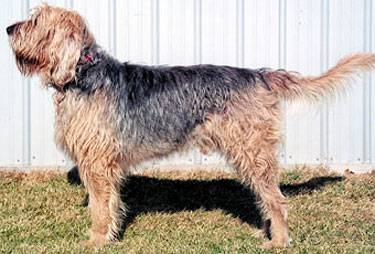

In [ ]:
Image(filenames[500])

In [ ]:
 labels_csv.breed[500]

'otterhound'